In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
anime = pd.read_csv('anime.csv')

In [3]:
ratings = pd.read_csv('rating.csv')

In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
#OVA is original video animation or anime released only video
#ONA is original net animation or anime released on the internet
#special refers to special releases, extended scened, cutout scenes
anime['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

over 7 million reviews by 73K unique users

In [6]:
#remove all -1 ratings
ratings = ratings[ratings['rating']!=-1]

In [7]:
rating_count = ratings.groupby('anime_id')['rating'].count().sort_values(ascending=False)

In [8]:
#get average rating per anime type
rating_avg = ratings.groupby('anime_id')['rating'].mean().sort_values(ascending=False)

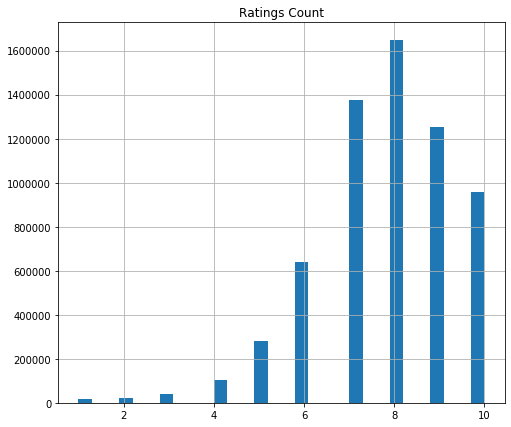

In [194]:
ratings['rating'].hist(bins=30,figsize=(8,7))
plt.title('Ratings Count');

### create df for ratings per movie

In [10]:
anime_ratings = pd.DataFrame(rating_count)

In [11]:
anime_ratings['ratings_avg'] = pd.DataFrame(rating_avg)

In [205]:
anime_ratings.reset_index(inplace=True,drop=True)

In [13]:
anime_ratings.rename(columns={'rating':'total_ratings'},inplace=True)

In [14]:
anime_ratings.head()

,anime_id,total_ratings,ratings_avg
0,1535,34226,8.834629
1,11757,26310,8.140213
2,16498,25290,8.725741
3,1575,24126,8.927796
4,6547,23565,8.549714


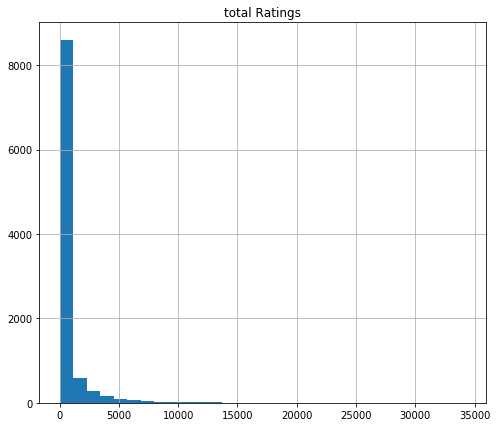

In [206]:
anime_ratings['total_ratings'].hist(bins=30,figsize=(8,7))
plt.title('total Ratings');

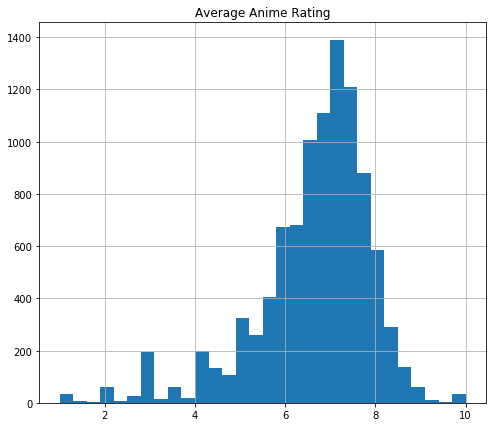

In [220]:
anime_ratings['ratings_avg'].hist(bins=30,figsize=(8,7))
plt.title('Average Anime Rating');

### clean ratings df

In [15]:
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


### per user rating count

In [16]:
user_count = pd.DataFrame(ratings.groupby('user_id')['rating'].count())

In [202]:
user_count.reset_index(inplace=True,drop=True)

In [18]:
user_count.rename(columns={'rating':'user_rating_count'},inplace=True)

In [19]:
user_count = user_count.sort_values(by='user_rating_count',ascending=False)

In [203]:
user_count.head()

,user_id,user_rating_count
0,42635,3747
1,53698,2905
2,57620,2689
3,59643,2632
4,51693,2621


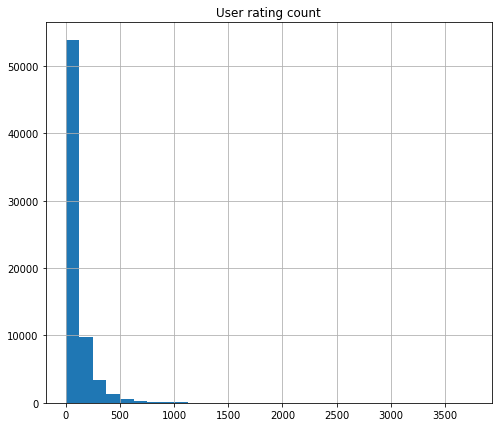

In [204]:
user_count['user_rating_count'].hist(bins=30,figsize=(8,7))
plt.title('User rating count');

### df for ratings per user per movie

In [21]:
rpu = pd.merge(ratings,user_count,on='user_id')

In [22]:
rpu.head()

,user_id,anime_id,rating,user_rating_count
0,1,8074,10,4
1,1,11617,10,4
2,1,11757,10,4
3,1,15451,10,4
4,2,11771,10,1


In [23]:
anime_ratings.head()

,anime_id,total_ratings,ratings_avg
0,1535,34226,8.834629
1,11757,26310,8.140213
2,16498,25290,8.725741
3,1575,24126,8.927796
4,6547,23565,8.549714


In [24]:
#merge ratings per user with anime ratings
rpm = pd.merge(anime_ratings,rpu,on='anime_id')

### Df for pivot table

In [25]:
df = pd.merge(anime,rpm,on='anime_id')

In [26]:
df.drop(columns=df.columns[2:7],axis=1,inplace=True)

In [27]:
df.rename(columns={'rating_y':'user_rating'},inplace=True)

In [28]:
df['ratings_avg']= round(df['ratings_avg'],0)

In [29]:
df.head()

,anime_id,name,total_ratings,ratings_avg,user_id,user_rating,user_rating_count
0,32281,Kimi no Na wa.,1961,9.0,99,5,131
1,32281,Kimi no Na wa.,1961,9.0,152,10,142
2,32281,Kimi no Na wa.,1961,9.0,244,10,275
3,32281,Kimi no Na wa.,1961,9.0,271,10,599
4,32281,Kimi no Na wa.,1961,9.0,322,10,87


### Set Threshold

In [30]:
user_count['user_rating_count'].describe()

count    69600.000000
mean        91.052313
std        135.764253
min          1.000000
25%         13.000000
50%         45.000000
75%        114.000000
max       3747.000000
Name: user_rating_count, dtype: float64

In [31]:
anime_ratings['total_ratings'].describe()

count     9927.000000
mean       638.384305
std       1795.865541
min          1.000000
25%          9.000000
50%         57.000000
75%        395.000000
max      34226.000000
Name: total_ratings, dtype: float64

In [32]:
# top 25% of unique movies with more than 375 ratings
df[df['total_ratings'] > 395]['name'].nunique()

2481

In [33]:
movie_ratings_threshold = 395
user_ratings_threshold = 91


In [35]:
# set new df with threshold parameters
df = df.loc[(df['user_rating_count'] > user_ratings_threshold) & (df['total_ratings'] > movie_ratings_threshold),: ]

In [36]:
#remove html characters
df['name'].replace(['&quot;','&',';','&quot'],'',inplace=True)

In [37]:
df.head()

,anime_id,name,total_ratings,ratings_avg,user_id,user_rating,user_rating_count
0,32281,Kimi no Na wa.,1961,9.0,99,5,131
1,32281,Kimi no Na wa.,1961,9.0,152,10,142
2,32281,Kimi no Na wa.,1961,9.0,244,10,275
3,32281,Kimi no Na wa.,1961,9.0,271,10,599
6,32281,Kimi no Na wa.,1961,9.0,462,8,302


In [38]:
### save df
df.to_csv('anime_dataframe')

### Create Pivot

In [39]:
pivot = df.pivot_table(values=['user_rating'],index=['user_id'],columns=['name'])

In [40]:
pivot.columns = pivot.columns.droplevel(0)

In [41]:
pivot.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Roots,...,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalize Pivot

In [58]:
norm = pivot.apply(lambda x: x-np.mean(x)/np.max(x)-np.min(x),axis=1)

In [59]:
norm.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Roots,...,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.567217,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,3.199265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#apply user average across nan values
norm = norm.apply(lambda x: x.fillna(x.mean()),axis=1)
norm.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Roots,...,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,...,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843,3.825843
5,2.895047,2.895047,2.895047,2.895047,2.895047,2.895047,2.895047,2.895047,2.895047,2.895047,...,2.895047,2.895047,2.895047,2.895047,2.895047,0.567217,2.895047,2.895047,2.895047,2.895047
7,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,...,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846,2.703846
11,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,...,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717,2.554717
14,2.405877,2.405877,3.199265,2.405877,2.405877,2.405877,2.405877,2.405877,2.405877,2.405877,...,2.405877,2.405877,2.405877,2.405877,2.405877,2.405877,2.405877,2.405877,2.405877,2.405877


### Calculate Cosine Similarity

In [67]:
recommender = pairwise_distances(norm,metric='cosine')

In [68]:
recommender.shape

(21495, 21495)

### Movie-Movie Collab

In [179]:
movie_similarity = pd.DataFrame(movie_recommender,index=pivot.columns,columns=pivot.columns)

### User-User Collab

In [72]:
user_similarity = pd.DataFrame(recommender,index=pivot.index,columns=pivot.index)
user_similarity.head()

user_id,3,5,7,11,14,17,21,29,38,43,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
user_id,,,,,,,,,,,,,,,,,,,,,
3,1.432188e-14,5.544822e-02,0.011042,8.195330e-03,0.007171,0.007781,0.005163,0.007378,0.012015,0.011071,...,0.006957,0.005056,0.017249,0.004602,0.008145,0.014932,0.003881,0.008880,0.010448,0.015512
5,5.544822e-02,3.408385e-14,0.060269,5.863877e-02,0.054948,0.056098,0.056397,0.053214,0.055621,0.058945,...,0.059259,0.056366,0.063779,0.055943,0.059133,0.061796,0.055159,0.057794,0.061314,0.064540
7,1.104239e-02,6.026859e-02,0.000000,1.617148e-02,0.012897,0.014370,0.011597,0.013949,0.017470,0.017693,...,0.013436,0.011638,0.024013,0.011451,0.013990,0.021989,0.011060,0.016045,0.017043,0.022124
11,8.195330e-03,5.863877e-02,0.016171,4.274359e-14,0.010223,0.012240,0.008476,0.010557,0.015727,0.013933,...,0.009717,0.007912,0.020333,0.007412,0.010941,0.017109,0.006920,0.011645,0.014310,0.018653
14,7.171019e-03,5.494847e-02,0.012897,1.022334e-02,0.000000,0.009690,0.006099,0.008195,0.012777,0.011711,...,0.008343,0.006501,0.018969,0.005791,0.008028,0.014557,0.005281,0.010065,0.012088,0.017327


### user-user similarity

In [162]:
# find most similar user for a randomly selected user.
user = np.random.choice(user_similarity.index)
most_similar = user_similarity[user].sort_values().index[1]
def similar_movies(user,most_similar):
    user1 = df[df['user_id']==user]
    user2 = df[df['user_id']==most_similar]
    common_movies = pd.merge(user1,user2,on=['anime_id'],how='inner')
    return common_movies.loc[:,['name_x','user_rating_x','user_rating_y']].head(10)   
print(f'user1: {user} , most similar: {most_similar}')

user1: 21262 , most similar: 49175


### Similarity Check

In [163]:
#verify user and similar user have similar ratings
similar_movies(user,most_similar)

,name_x,user_rating_x,user_rating_y
0,Code Geass: Hangyaku no Lelouch R2,9,10
1,Code Geass: Hangyaku no Lelouch,9,10
2,Hajime no Ippo,10,10
3,Cowboy Bebop,9,10
4,Tengen Toppa Gurren Lagann,10,10
5,Great Teacher Onizuka,9,10
6,Death Note,10,10
7,Shingeki no Kyojin,9,10
8,Psycho-Pass,10,8
9,Samurai Champloo,9,10


### movies not watched by user

In [223]:
# return list of unseen movies by user 1
user1_lst = []
user2_lst = []
user1 = df[df['user_id']==user]
user2 = df[df['user_id']==most_similar]

for i in user1['name']:
    user1_lst.append(i)
for j in user2['name']:     
    user2_lst.append(j)

unseen = [item for item in user2_lst if item not in user1_lst]
unseen_df = pd.DataFrame(unseen,columns=['name'])

In [226]:
unseen_df.head(10)

,name
0,Clannad: After Story
1,Shigatsu wa Kimi no Uso
2,Re:Zero kara Hajimeru Isekai Seikatsu
3,Hunter x Hunter
4,No Game No Life
5,Nodame Cantabile
6,Rurouni Kenshin: Meiji Kenkaku Romantan
7,Clannad
8,Initial D First Stage
9,Lovely★Complex


### Predict user score S(u,i)

### Find top 5 Similiar Users

In [227]:
lst = []
top_5 = user_similarity[user].sort_values().index[1:6]
for sim_user in top_5:
    lst.append(sim_user)
    
top_5 = pd.DataFrame(lst,columns=['top5'])   